## Quest
- 분석 대상 : 
성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
- 단일 변수 chart 각각 작성
- 이상치와 결측치가 없는 데이터셋 만들기
- option : 연령이 중앙값~Q3 범위 속한 인원 수 찾기

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df_ROS=pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS[:2]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [3]:
df_ROS.columns 

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [4]:
target_df_ROS=df_ROS[['성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '직업', '혈액형','재발여부']]
target_df_ROS[:2]

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
0,2,163,0,60.3,0,66,자영업,RH+A,0
1,1,171,0,71.7,0,47,운동선수,RH+A,0


In [5]:
target_df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


전체 레코드 : 1894 개 

In [6]:
target_df_ROS.describe()

,성별,신장,심혈관질환,체중,흡연여부,연령,재발여부
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,1.383316,168.027983,0.035903,68.111140,0.217001,41.463569,0.119852
std,0.486323,9.211419,0.186097,11.234318,0.412312,13.444629,0.324874
min,1.000000,140.000000,0.000000,35.000000,0.000000,15.000000,0.000000
25%,1.000000,161.000000,0.000000,59.700000,0.000000,32.000000,0.000000
50%,1.000000,169.000000,0.000000,68.000000,0.000000,41.000000,0.000000
75%,2.000000,175.000000,0.000000,75.000000,0.000000,49.000000,0.000000
max,2.000000,204.000000,1.000000,136.100000,1.000000,86.000000,1.000000


In [7]:
target_df_ROS['성별'].value_counts()

1    1168
2     726
Name: 성별, dtype: int64

In [8]:
target_df_ROS['심혈관질환'].value_counts()

0    1826
1      68
Name: 심혈관질환, dtype: int64

In [9]:
target_df_ROS['흡연여부'].value_counts()

0    1483
1     411
Name: 흡연여부, dtype: int64

In [10]:
target_df_ROS['재발여부'].value_counts()

0    1667
1     227
Name: 재발여부, dtype: int64

In [11]:
target_df_ROS.describe(include=object)

,직업,혈액형
count,1479,1894
unique,17,4
top,사무직,RH+A
freq,449,688


Data Type
- 범주형 변수: 성별, 심혈관질환, 흡연여부, 재발여부, 직업, 혈액형
- 연속형 변수: 신장, 체중, 연령 

### 결측치 처리

In [12]:
# 결측치 확인
target_df_ROS.isnull().sum()

성별         0
신장         0
심혈관질환      0
체중         0
흡연여부       0
연령         0
직업       415
혈액형        0
재발여부       0
dtype: int64

=> 결측치가 발견되는 column : '직업'

In [13]:
# 결측치 삭제
drp_df_ROS=target_df_ROS.dropna()
drp_df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


전체 레코드 : 1894 -> 1479개 

### 단일변수 범주형 chart

In [14]:
['성별', '심혈관질환', '흡연여부', '재발여부', '직업', '혈액형']

['성별', '심혈관질환', '흡연여부', '재발여부', '직업', '혈액형']

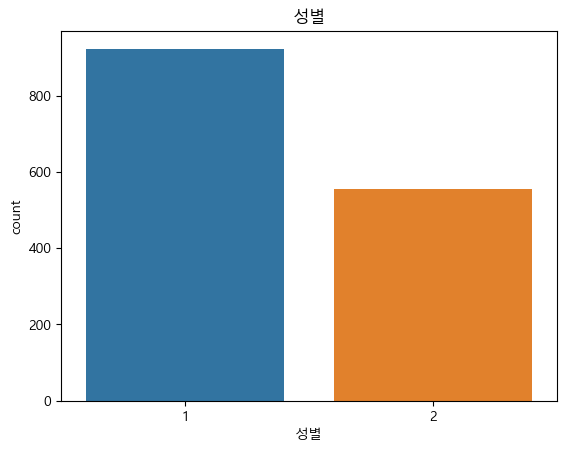

In [15]:
# 성별 Count
sns.countplot(data=drp_df_ROS, x='성별') 
plt.title("성별")
plt.show()

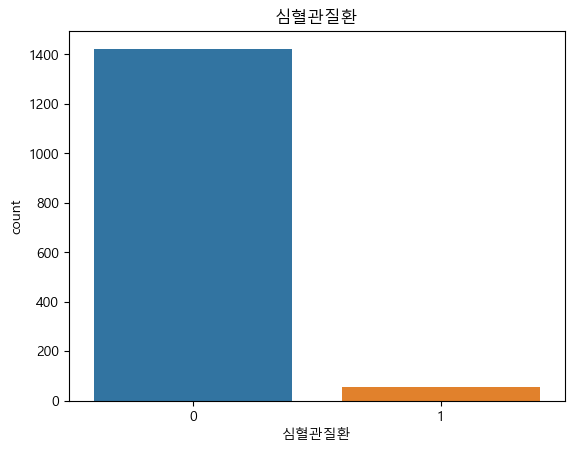

In [16]:
# 심혈관질환 Count
sns.countplot(data=drp_df_ROS, x='심혈관질환') 
plt.title("심혈관질환")
plt.show()

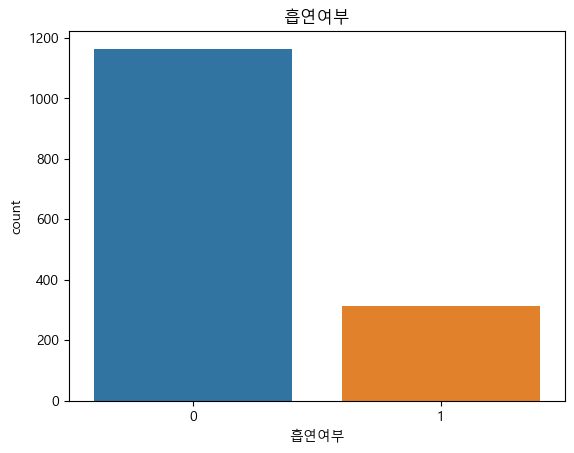

In [17]:
# 흡연여부 Count
sns.countplot(data=drp_df_ROS, x='흡연여부') 
plt.title("흡연여부")
plt.show()

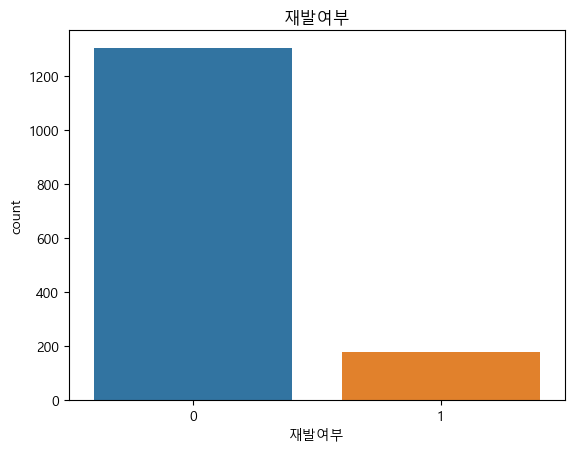

In [18]:
# 재발여부 Count
sns.countplot(data=drp_df_ROS, x='재발여부') 
plt.title("재발여부")
plt.show()

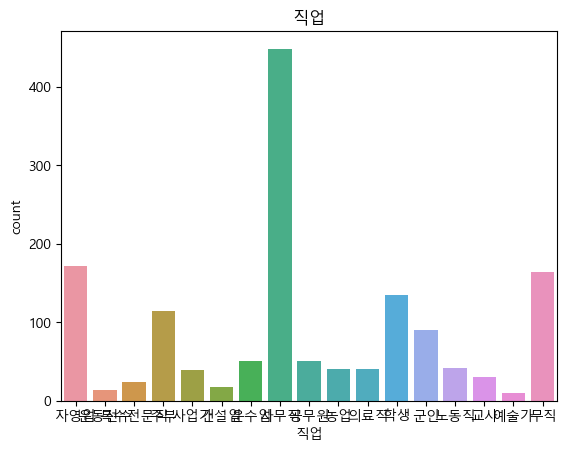

In [19]:
# 직업 Count
sns.countplot(data=drp_df_ROS, x='직업') 
plt.title("직업")
plt.show()

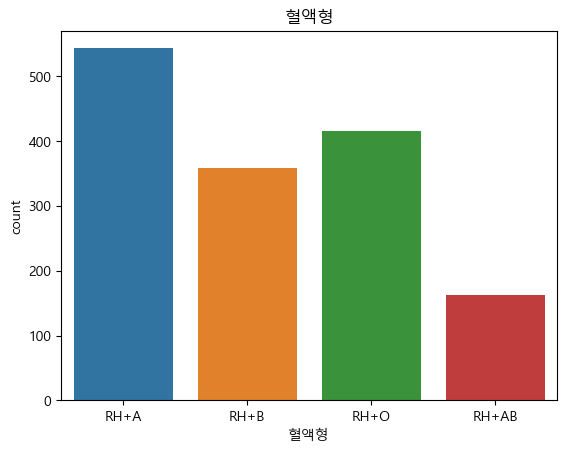

In [20]:
# 혈액형 Count
sns.countplot(data=drp_df_ROS, x='혈액형') 
plt.title("혈액형")
plt.show()

### 단일변수 연속형 chart

In [21]:
['신장', '체중', '연령'] 

['신장', '체중', '연령']

### 이상치 확인

<Axes: xlabel='신장'>

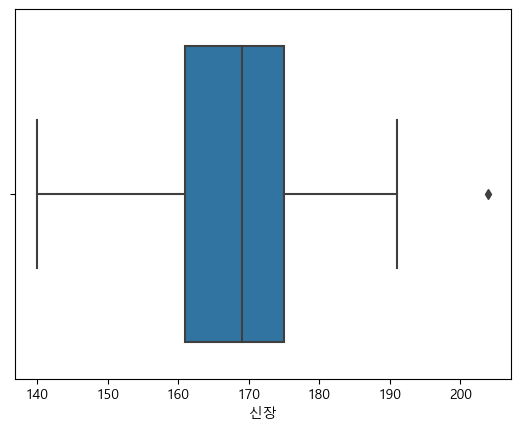

In [22]:
sns.boxplot(drp_df_ROS, x='신장')

<Axes: xlabel='체중'>

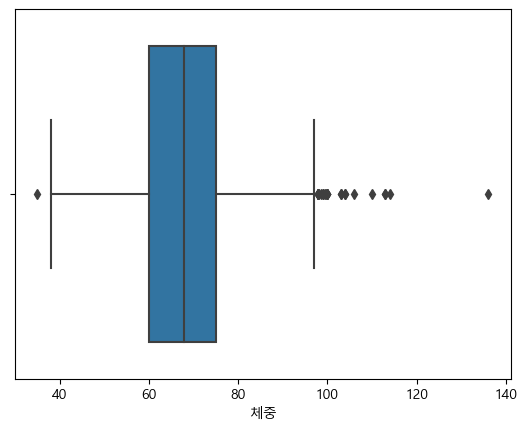

In [23]:
sns.boxplot(drp_df_ROS, x='체중')

<Axes: xlabel='연령'>

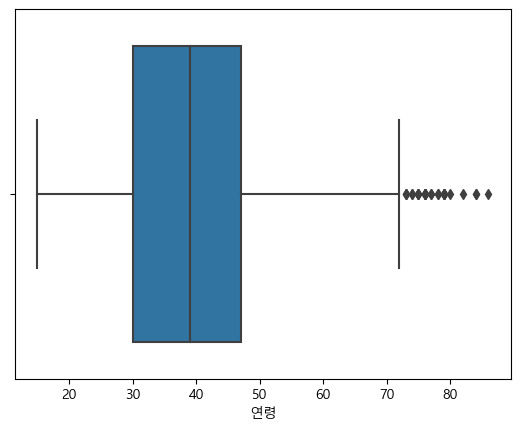

In [24]:
sns.boxplot(drp_df_ROS, x='연령')

### 이상치 제거

In [25]:
# Q1, Q3, IQR, min, max 구하기
# Q1_=np.percentile(drp_df_ROS[''],25)
# Q3_=np.percentile(drp_df_ROS[''],75)
# IQR_=Q3_-Q1_
# min_=Q1_-1.5*IQR_
# max_=Q3_+1.5*IQR_
#'신장'
Q1_height=np.percentile(drp_df_ROS['신장'],25)
Q3_height=np.percentile(drp_df_ROS['신장'],75)
IQR_height=Q3_height-Q1_height
min_height=Q1_height-1.5*IQR_height
max_height=Q3_height+1.5*IQR_height
#'체중'
Q1_weight=np.percentile(drp_df_ROS['체중'],25)
Q3_weight=np.percentile(drp_df_ROS['체중'],75)
IQR_weight=Q3_weight-Q1_weight
min_weight=Q1_weight-1.5*IQR_weight
max_weight=Q3_weight+1.5*IQR_weight
#'연령'
Q1_age=np.percentile(drp_df_ROS['연령'],25)
Q3_age=np.percentile(drp_df_ROS['연령'],75)
IQR_age=Q3_age-Q1_age
min_age=Q1_age-1.5*IQR_age
max_age=Q3_age+1.5*IQR_age

In [26]:
print('신장 :: Q1: {}, Q3: {}, IQR: {}, min: {}, max: {}'.format(Q1_height,Q3_height,IQR_height,min_height,max_height))
print('체중 :: Q1: {}, Q3: {}, IQR: {}, min: {}, max: {}'.format(Q1_weight,Q3_weight,IQR_weight,min_weight,max_weight))
print('연령 :: Q1: {}, Q3: {}, IQR: {}, min: {}, max: {}'.format(Q1_age,Q3_age,IQR_age,min_age,max_age))

신장 :: Q1: 161.0, Q3: 175.0, IQR: 14.0, min: 140.0, max: 196.0
체중 :: Q1: 60.0, Q3: 75.15, IQR: 15.150000000000006, min: 37.27499999999999, max: 97.87500000000001
연령 :: Q1: 30.0, Q3: 47.0, IQR: 17.0, min: 4.5, max: 72.5


In [27]:
# filter
condition = (drp_df_ROS['신장'] >= min_height) & (drp_df_ROS['신장'] <= max_height)\
            &(drp_df_ROS['체중'] >= min_weight) & (drp_df_ROS['체중'] <= max_weight)\
            &(drp_df_ROS['연령'] >= min_age) & (drp_df_ROS['연령'] <= max_age)

In [28]:
filt_df_ROS = drp_df_ROS[condition]

### 이상치 제거 확인

<Axes: xlabel='신장'>

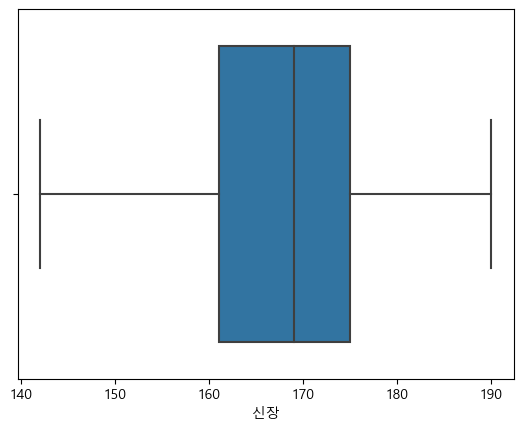

In [29]:
sns.boxplot(filt_df_ROS, x='신장')

<Axes: xlabel='체중'>

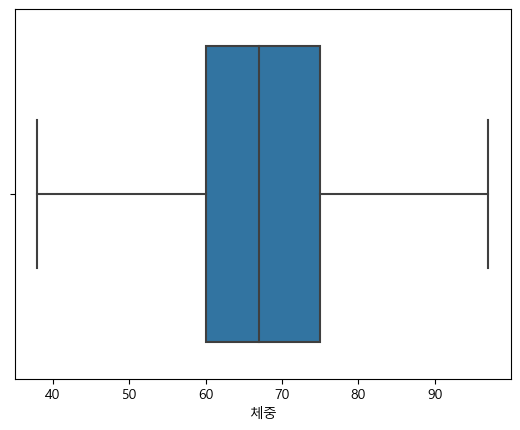

In [30]:
sns.boxplot(filt_df_ROS, x='체중')

<Axes: xlabel='연령'>

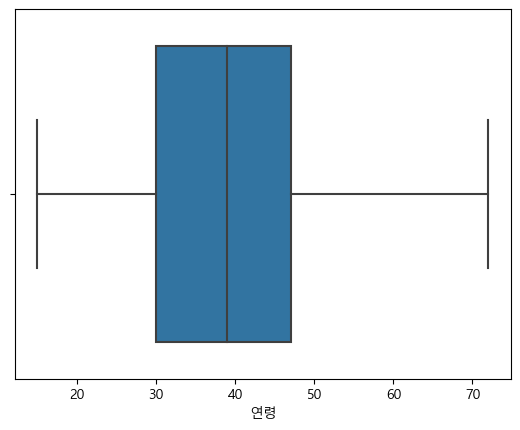

In [31]:
sns.boxplot(filt_df_ROS, x='연령')

### 단일변수 연속형 chart

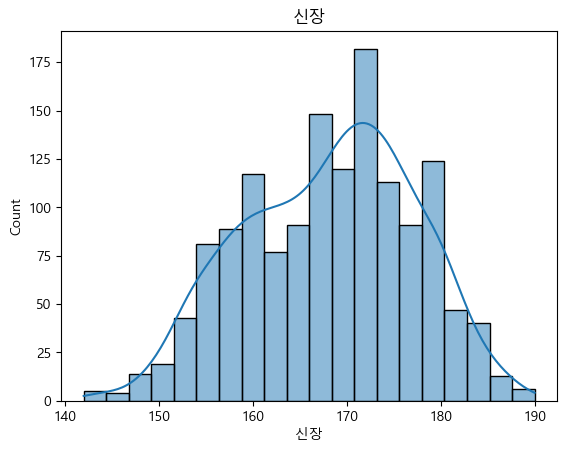

In [32]:
sns.histplot(data=filt_df_ROS, x='신장', kde=True)
plt.title("신장")
plt.show()

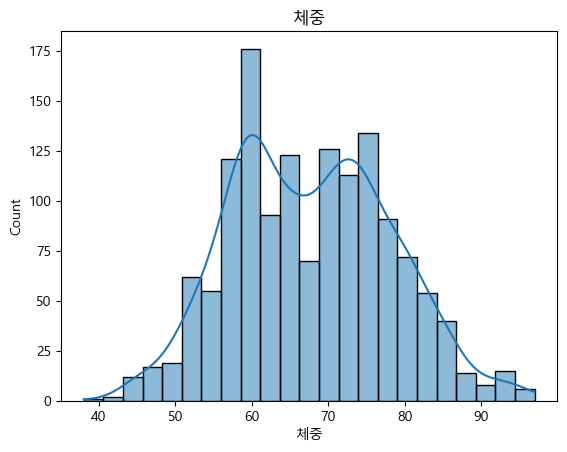

In [33]:
sns.histplot(data=filt_df_ROS, x='체중', kde=True)
plt.title("체중")
plt.show()

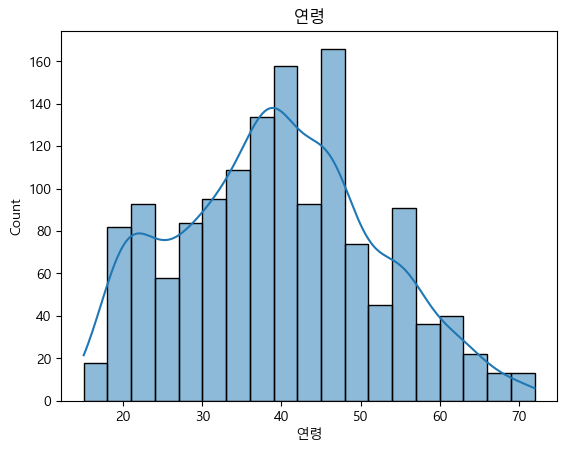

In [34]:
sns.histplot(data=filt_df_ROS, x='연령', kde=True)
plt.title("연령")
plt.show()

###  option 
#### 연령이 중앙값~Q3 범위 속한 인원 수 찾기

In [35]:
# 중앙값, Q3

#'연령'
med_age=np.percentile(drp_df_ROS['연령'],50)
Q3_age=np.percentile(drp_df_ROS['연령'],75)

print('연령 :: median: {}, Q3: {}'.format(med_age,Q3_age))

연령 :: median: 39.0, Q3: 47.0


In [36]:
opt_condition = (drp_df_ROS['연령'] >= med_age) & (drp_df_ROS['연령'] <= Q3_age)

In [41]:
opt_df_ROS=drp_df_ROS.loc[opt_condition]

In [46]:
len(opt_df_ROS)

421

연령이 중앙값~Q3 범위에 속한 인원수 : 421 명 